### Average over multiple runs  - Phase or amplirude noise -  Method 1
Plot the emittance growth in the presence of phase noise - PN. The simulation for each set of parameters is repeated multiple times. The mean and the standard deviation of the emittance values are computed over all runs (part 3) for each turn. The normalised emittance is used here. 

In [2]:
import sys
import csv
import numpy as np
import pickle
import matplotlib.pyplot as plt

#### Plotting paramerters

In [93]:
params = {'legend.fontsize': 25,
          'figure.figsize': (20.5, 15.5),
          'axes.labelsize': 27,
          'axes.titlesize': 25,
          'xtick.labelsize': 27,
          'ytick.labelsize': 27,
          'image.cmap': 'jet',
          'lines.linewidth': 2,
          'lines.markersize': 5,
          'font.family': 'sans-serif'}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

#### 1) Load the data
a) Give the paths to the data folder

b) Load the values of the transverse emittances in lists.

In [6]:
n_sets = 20
n_runs = 3 # number of runs that the simulation was repeated
n_turns = int(1e5)            # number of cycles to run the simulation for
decTurns = int(100)           # how often to record data
circumference  = 6911.5623 # [m]
f_rev  = 299792458/circumference  # [Hz] The revolution frequency of the machine 
separationTime = 1 / f_rev * decTurns #There are decTurns revolutions before each recording of data
tspan = (np.arange(n_turns / decTurns) + 1.0) * separationTime #total time spanned by the simulation

In [179]:
my_start = 400.0 #9.6e3 #400.0
my_stop =  1e4#1.6e4 #1.6e4
my_step = 800.0

my_variables = list(np.arange(my_start, my_stop, my_step))

my_variables = ['11600.0']
print(my_variables)
print(len(my_variables))

['11600.0']
1


In [180]:
path_to_data = '/afs/cern.ch/work/n/natriant/private/pyheadtail_example_crabcavity/finished_jobs/'
study_name = 'sps_270GeV_CC_PN1e-8_1e5turns_5e5Nb_Nowakefields_ayy'
noise_type = 'PN'

In [181]:
ex_dict, ey_dict = {}, {} # type: dictionary


#meanX_dict, meanY_dict = {}, {}


for var in my_variables:
    for my_set in range(n_sets):
        for run in range(n_runs):
            temp_name = f'{var}_set{my_set}_run{run}' # the suffix of the name of the current study
            # A1. Load the data - study 1
            try:
                meanX, meanY, meanXsq, meanYsq, emitX, emitY = np.loadtxt(path_to_data+f'{study_name}{var}_fixedKicksSet{my_set}_run{run}/file.txt', delimiter = ",", unpack = True)
                # B1. Create a different list for each run and save the emittance values
                ex_dict[temp_name] = emitX 
                ey_dict[temp_name] = emitY
            except OSError as err:
                print("OS error: {0}".format(err))
                ex_dict[temp_name] = np.zeros(len(tspan)) 
                ey_dict[temp_name] = np.zeros(len(tspan))

### Plot all Sets all runs, y-plane

In [182]:
savefig = True

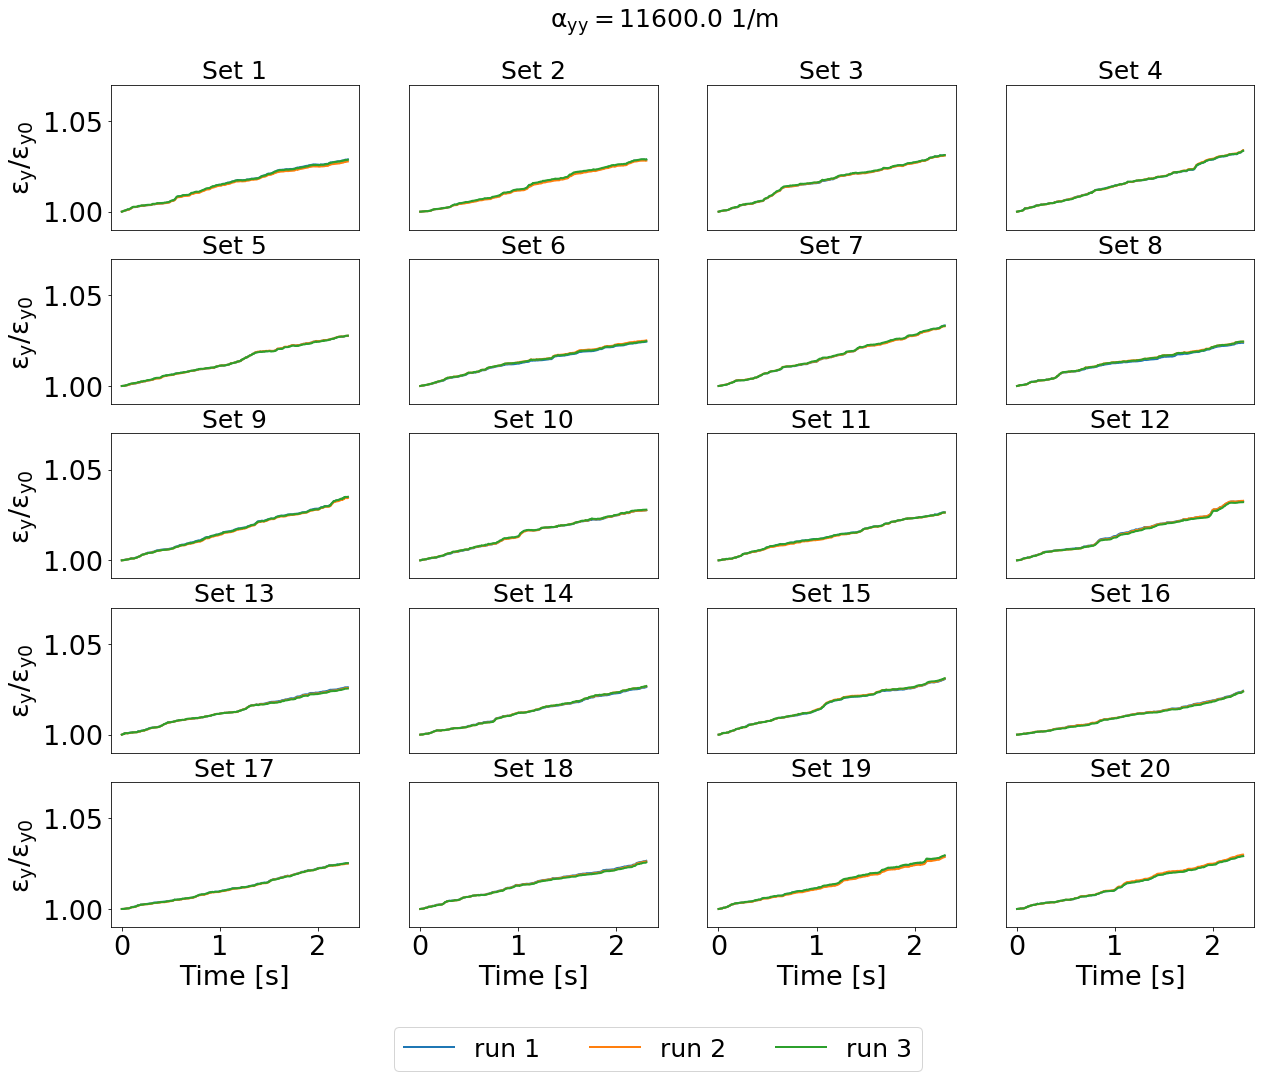

In [183]:
for var in my_variables:
    plt.figure(0)
    plots = []
    my_set = 0
    for i in range(5):
        for j in range(4):
            ax = plt.subplot2grid((5,4), (i,j))

            for run in range(n_runs):
                temp_name = f'{var}_set{my_set}_run{run}'
                if not ey_dict[temp_name].all()==0:
                    
                    if my_set != 0:
                        ax.plot(tspan, ey_dict[temp_name]/ey_dict[temp_name][0])
                        ax.set_ylim(0.99, 1.07)
                        ax.set_title(f'Set {my_set+1}')
                    else:
                        ax.plot(tspan, ey_dict[temp_name]/ey_dict[temp_name][0], label=f'run {run+1}')
                        ax.set_ylim(0.99, 1.07)
                        ax.set_title(f'Set {my_set+1}')
                        ax.legend(loc='upper center', bbox_to_anchor=(2.2, -5.4), ncol=5)
                    
                    ax.set_xlabel('Time [s]')
                    if my_set <= 15:
                        ax.get_xaxis().set_visible(False)
                    
                    if my_set in [0, 4, 8, 12, 16]:
                        ax.set_ylabel(r'$\mathrm{\epsilon_y / \epsilon_{y0}}$')
                    else:
                        ax.get_yaxis().set_visible(False)
                else:
                    print(f'study {temp_name} skipped')
            my_set=my_set+1
            
    plt.subplots_adjust(wspace=0.2)
    plt.suptitle(r'$\mathrm{\alpha_{yy}}=$'+f'{var} 1/m',  y=0.95, fontsize=25)

    if savefig:
        plt.savefig(f'./output/ey_{study_name}{var}_allsets_allruns.png', bbox_inches='tight')
    plt.show()
    plt.close()

### Plot all Sets all runs, x-plane

In [184]:
savefig= True

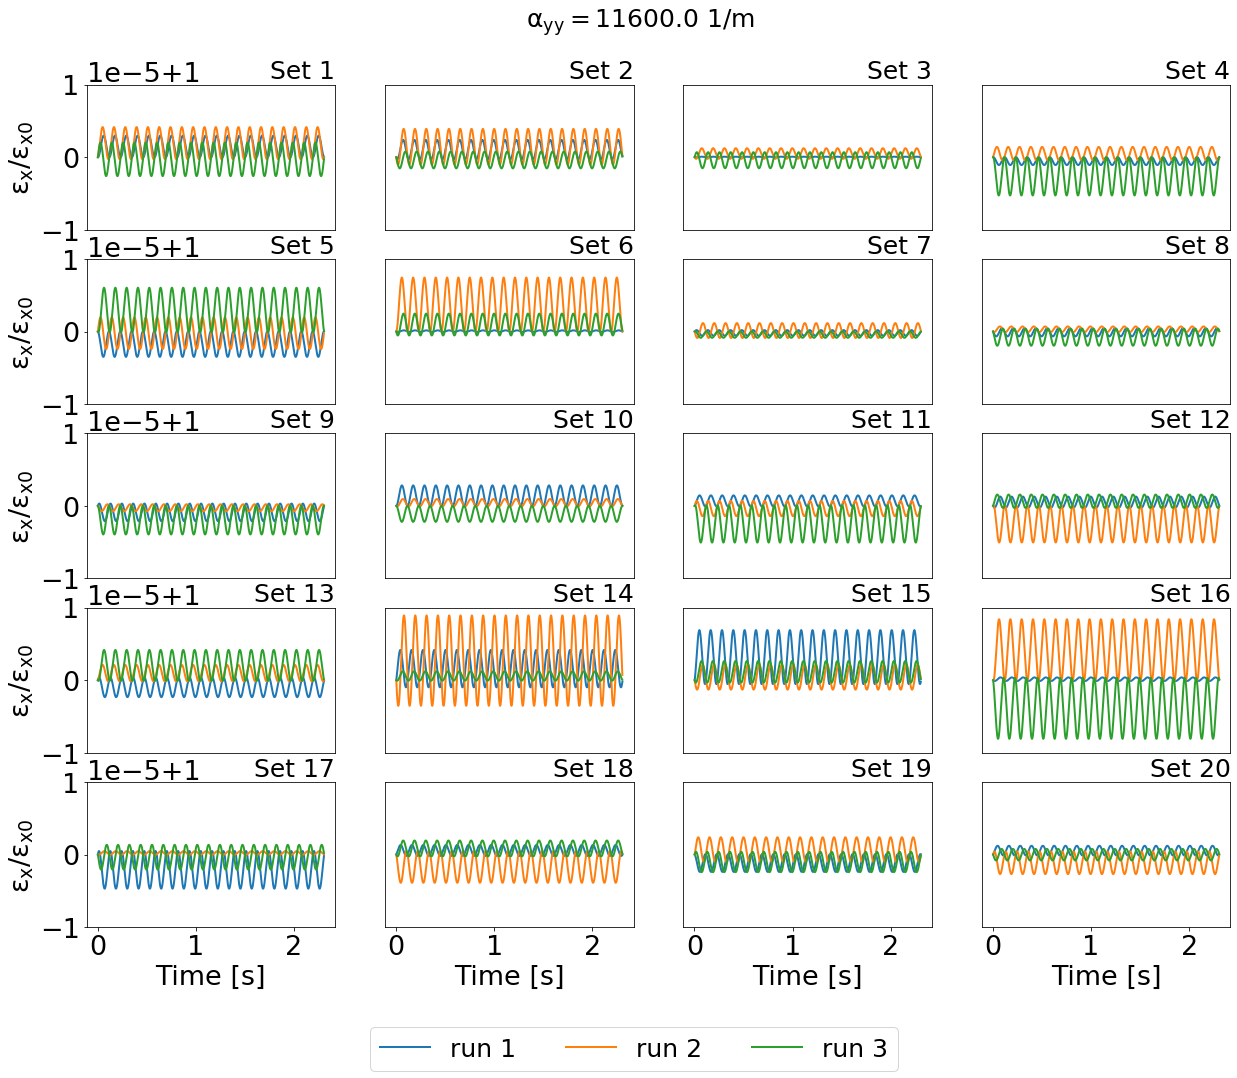

In [185]:
for var in my_variables:
    plt.figure(0)
    plots = []
    my_set = 0
    for i in range(5):
        for j in range(4):
            ax = plt.subplot2grid((5,4), (i,j))

            for run in range(n_runs):
                temp_name = f'{var}_set{my_set}_run{run}'
                if not ey_dict[temp_name].all()==0:
                    
                    if my_set != 0:
                        ax.plot(tspan, ex_dict[temp_name]/ex_dict[temp_name][0])
                        ax.set_ylim(1-1e-5, 1+1e-5)
                        ax.set_title(f'Set {my_set+1}', loc='right')
                    else:
                        ax.plot(tspan, ex_dict[temp_name]/ex_dict[temp_name][0], label=f'run {run+1}')
                        ax.set_ylim(1-1e-5, 1+1e-5)
                        ax.set_title(f'Set {my_set+1}', loc='right')
                        ax.legend(loc='upper center', bbox_to_anchor=(2.2, -5.4), ncol=5)
                    
                    ax.set_xlabel('Time [s]')
                    ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
                    if my_set <= 15:
                        ax.get_xaxis().set_visible(False)
                    
                    if my_set in [0, 4, 8, 12, 16]:
                        ax.set_ylabel(r'$\mathrm{\epsilon_x / \epsilon_{x0}}$')
                        
                    else:
                        ax.get_yaxis().set_visible(False)
                else:
                    print(f'study {temp_name} skipped')
                    
            my_set=my_set+1
            
    plt.subplots_adjust(wspace=0.2)
    plt.suptitle(r'$\mathrm{\alpha_{yy}}=$'+f'{var} 1/m',  y=0.95, fontsize=25)

    if savefig:
        plt.savefig(f'./output/ex_{study_name}{var}_allsets_allruns.png', bbox_inches='tight')
    plt.show()
    plt.close()